# Statistics - Normal, Midi, Mini, Tiny

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import pickle
from statsmodels.stats.weightstats import ztest
import json
from IPython.display import display

In [2]:
def vish(measure, algorithm):
    path='../Figures/Wilcoxon/size_'+measure+'_'+algorithm+'.csv';
    with open(path, 'r') as fp:
        frame = pd.DataFrame(json.load(fp));
        fp.close();
    return frame
        
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [3]:
%run ../Classes/Dataset.py #Load all the Datasets Objects Later
%run ../Classes/xvalidation.py #
%run ../Classes/Imbalance_Plotter.py #Load all the Datasets Objects Later
%run ../Classes/Run_imbalances.py #

In [4]:
def saveresults(results, measure, algorithm):
    path='../Figures/Wilcoxon/size_'+measure+'_'+algorithm+'.csv';
    with open(path, 'w+') as fp:
        json.dump(results, fp);    

## Separting per Dataset - Normal, Midi, Mini, Tiny

In [6]:
imbalances={'Normal':[[],[],[],[],[]], 'Midi':[[],[],[],[],[]], 'Mini':[[],[],[],[],[]], 'Tiny':[[],[],[],[],[]]};

with open('../Saved-Objects/Imbalance_Runs/Imbalance_Normal.txt', 'rb') as fp:
    imb = pickle.load(fp);
    fp.close();
    for imbalance in imb.xval_dt:
        imbalances['Normal'][0].append(imbalance);
    for imbalance in imb.xval_knn:
        imbalances['Normal'][1].append(imbalance); 
    for imbalance in imb.xval_rf:
        imbalances['Normal'][2].append(imbalance);
    for imbalance in imb.xval_sgd:
        imbalances['Normal'][3].append(imbalance);                    
    for imbalance in imb.xval_svc:
        imbalances['Normal'][4].append(imbalance);   
            
            
with open('../Saved-Objects/Imbalance_Runs/Imbalance_Midi.txt', 'rb') as fp:
    imb = pickle.load(fp);
    fp.close();
    for imbalance in imb.xval_dt:
        imbalances['Midi'][0].append(imbalance);
    for imbalance in imb.xval_knn:
        imbalances['Midi'][1].append(imbalance); 
    for imbalance in imb.xval_rf:
        imbalances['Midi'][2].append(imbalance);
    for imbalance in imb.xval_sgd:
        imbalances['Midi'][3].append(imbalance);                    
    for imbalance in imb.xval_svc:
        imbalances['Midi'][4].append(imbalance);  
            
with open('../Saved-Objects/Imbalance_Runs/Imbalance_Mini.txt', 'rb') as fp:
    imb = pickle.load(fp);
    fp.close();
    for imbalance in imb.xval_dt:
        imbalances['Mini'][0].append(imbalance);
    for imbalance in imb.xval_knn:
        imbalances['Mini'][1].append(imbalance); 
    for imbalance in imb.xval_rf:
        imbalances['Mini'][2].append(imbalance);
    for imbalance in imb.xval_sgd:
        imbalances['Mini'][3].append(imbalance);                    
    for imbalance in imb.xval_svc:
        imbalances['Mini'][4].append(imbalance); 
            
with open('../Saved-Objects/Imbalance_Runs/Imbalance_Tiny.txt', 'rb') as fp:
    imb = pickle.load(fp);
    fp.close();
    for imbalance in imb.xval_dt:
        imbalances['Tiny'][0].append(imbalance);
    for imbalance in imb.xval_knn:
        imbalances['Tiny'][1].append(imbalance); 
    for imbalance in imb.xval_rf:
        imbalances['Tiny'][2].append(imbalance);
    for imbalance in imb.xval_sgd:
        imbalances['Tiny'][3].append(imbalance);                    
    for imbalance in imb.xval_svc:
        imbalances['Tiny'][4].append(imbalance); 


In [43]:
dataset_names=['Normal', 'Midi', 'Mini', 'Tiny']
performance_names=['accuracy', 'precision', 'recall', 'f1', 'auc']
algorithm_names=['dt', 'knn', 'rf', 'sgd', 'svm']

Imbs['Normal'-'Midi'-'Mini'-'Tiny']['accuracy'-'precision'-'recall'-'f1'-'auc']['dt'-'knn'-'rf'-sgd'-'svm'

In [36]:
normal_imb = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
midi_imb = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
mini_imb = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
tiny_imb = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};

imbs = [normal_imb, midi_imb, mini_imb, tiny_imb]

for level in range(0, len(imbalances)):
    for algorithm in range(0, len(imbalances[dataset_names[level]])):
        for xval in imbalances[dataset_names[level]][algorithm]:
            accuraciez=xval.accuracies;
            precisionz=xval.precisions0;
            recallz=xval.recalls0;
            f1scorez=xval.f1scores0;
            aucz=xval.aucs;
            imbs[level]['accuracy'][algorithm] += accuraciez[0]+accuraciez[1]+accuraciez[2]+accuraciez[3]+accuraciez[4];
            imbs[level]['precision'][algorithm] += precisionz[0]+precisionz[1]+precisionz[2]+precisionz[3]+precisionz[4];
            imbs[level]['recall'][algorithm] += recallz[0]+recallz[1]+recallz[2]+recallz[3]+recallz[4];
            imbs[level]['f1'][algorithm] += f1scorez[0]+f1scorez[1]+f1scorez[2]+f1scorez[3]+f1scorez[4];
            imbs[level]['auc'][algorithm] += aucz[0]+aucz[1]+aucz[2]+aucz[3]+aucz[4];

Plots for the  accuracy  and  dt


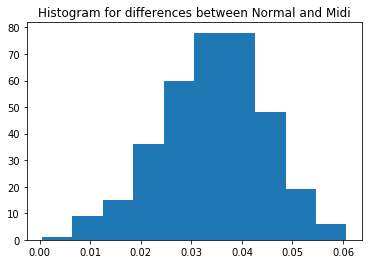

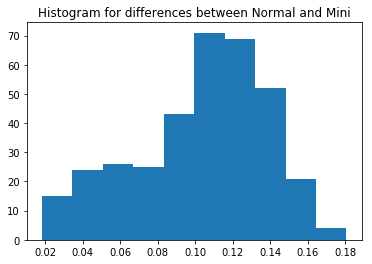

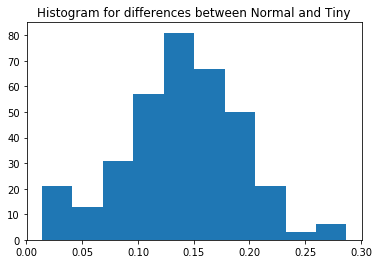

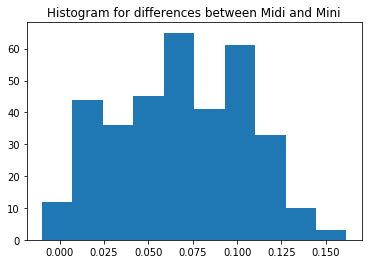

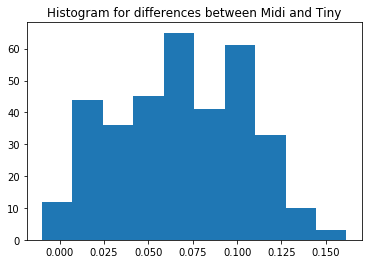

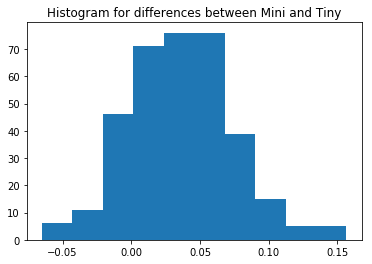

Plots for the  accuracy  and  knn


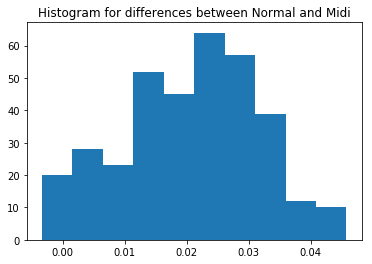

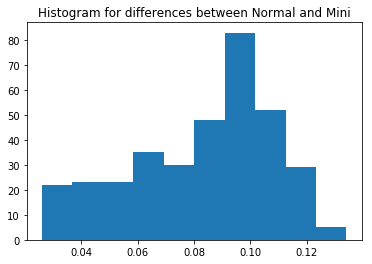

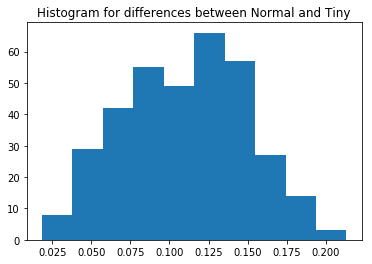

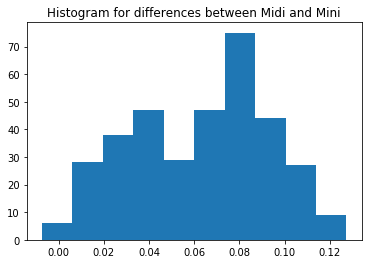

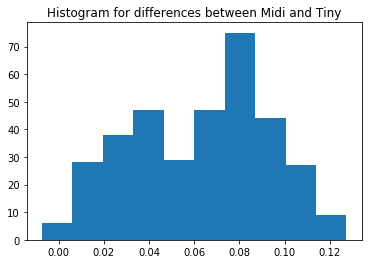

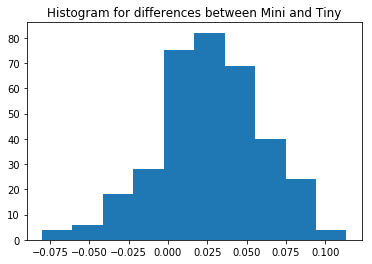

Plots for the  accuracy  and  rf


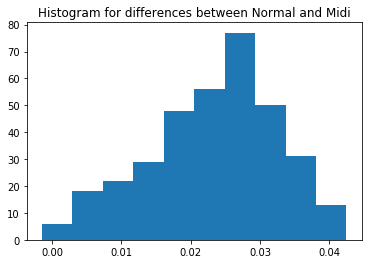

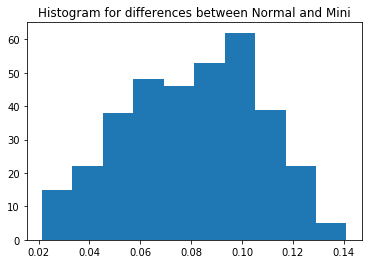

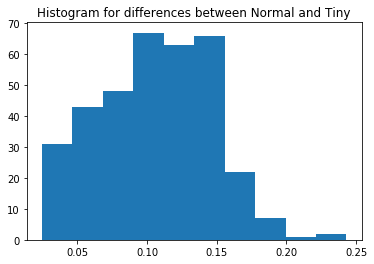

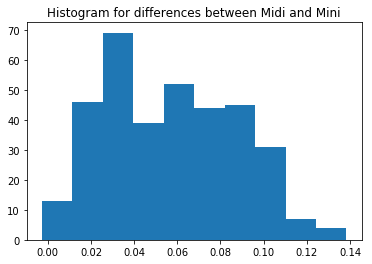

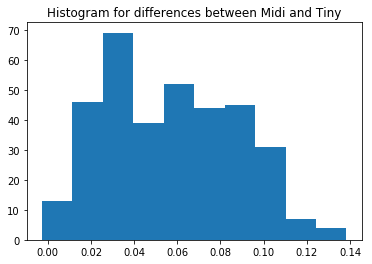

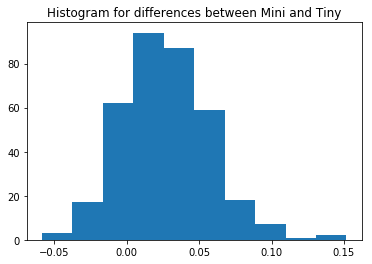

Plots for the  accuracy  and  sgd


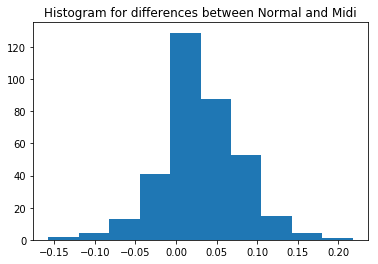

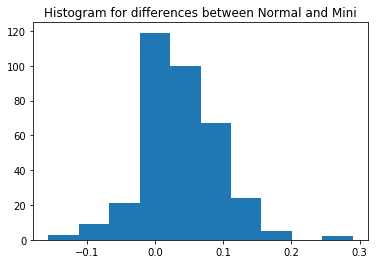

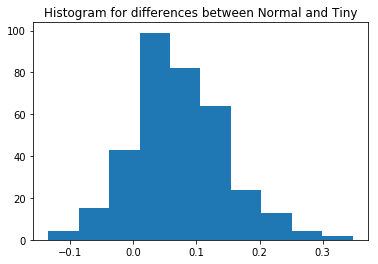

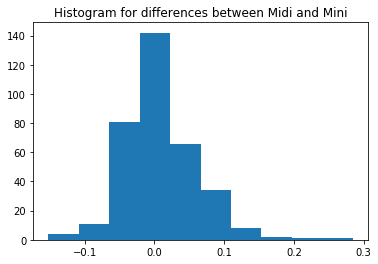

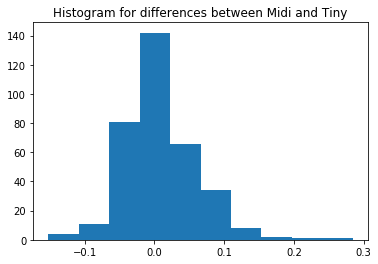

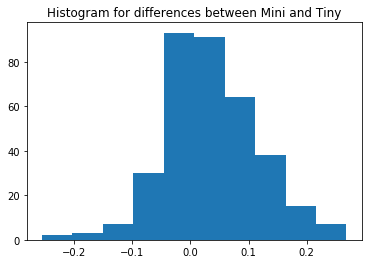

Plots for the  accuracy  and  svm


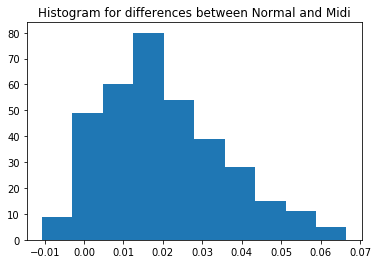

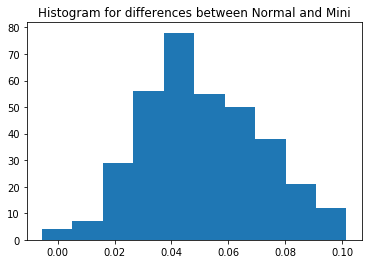

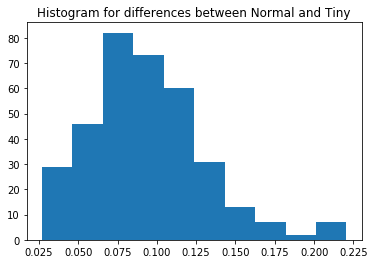

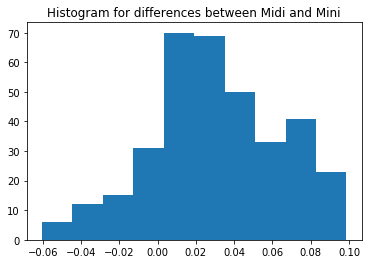

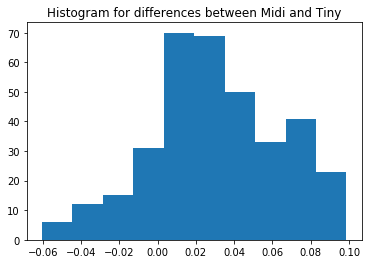

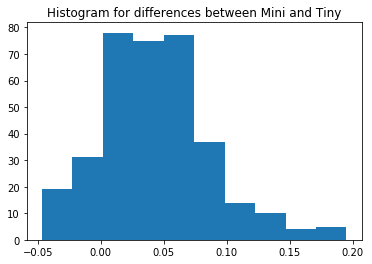

Plots for the  precision  and  dt


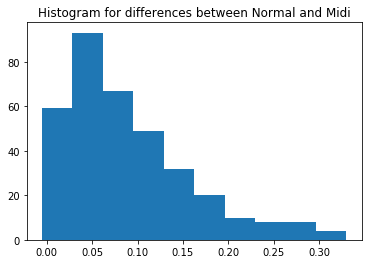

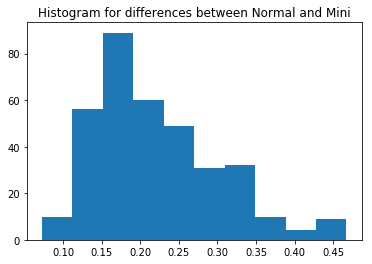

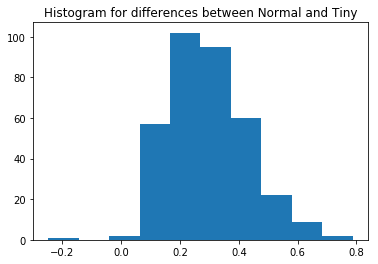

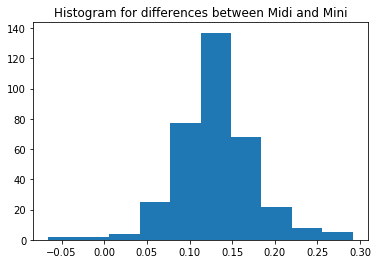

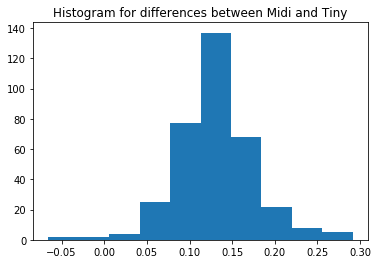

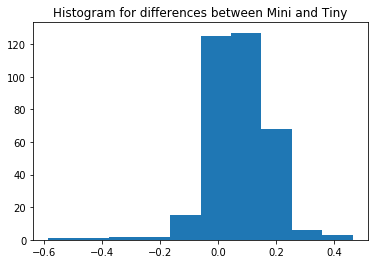

Plots for the  precision  and  knn


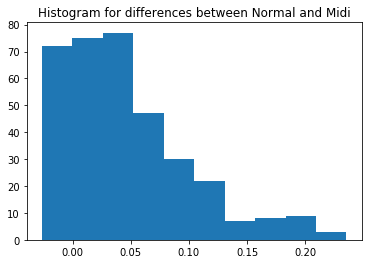

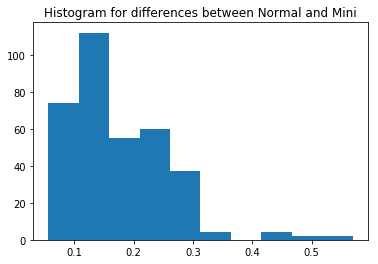

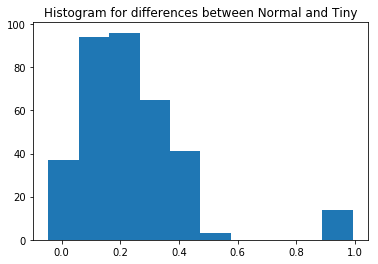

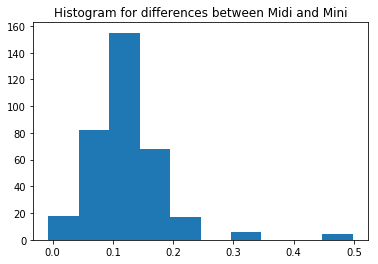

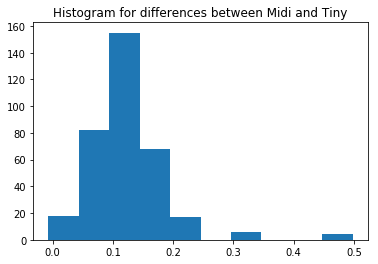

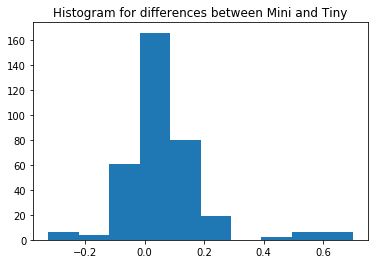

Plots for the  precision  and  rf


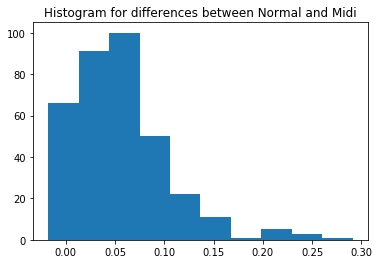

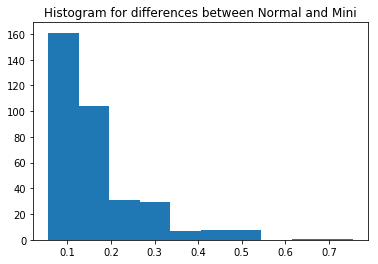

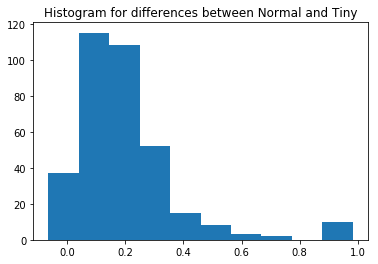

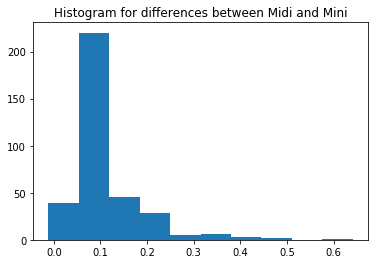

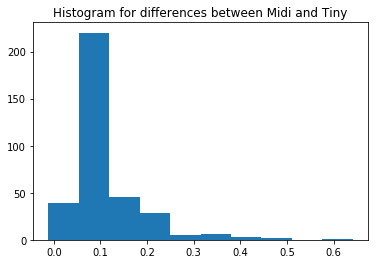

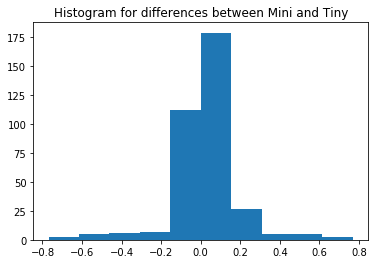

Plots for the  precision  and  sgd


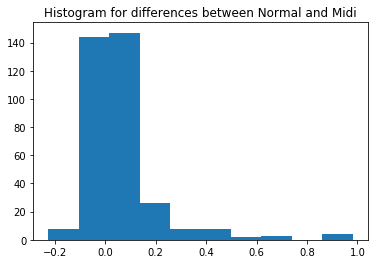

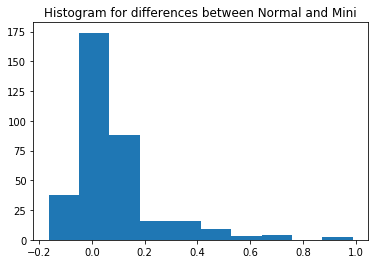

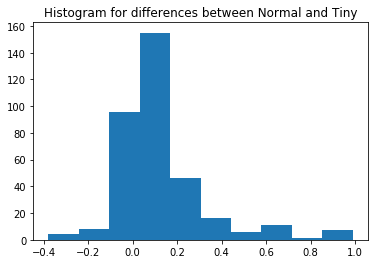

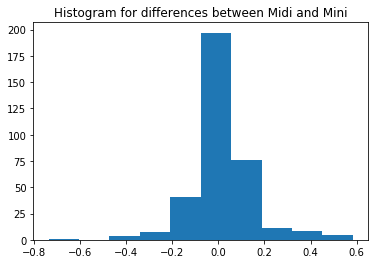

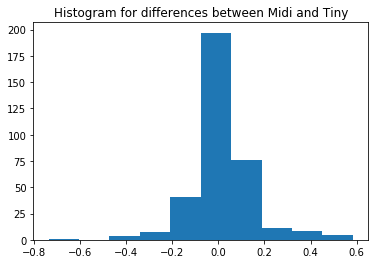

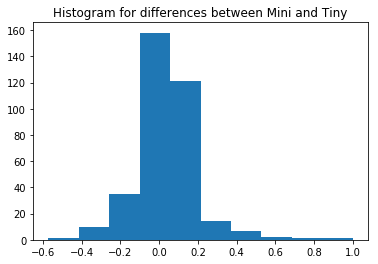

Plots for the  precision  and  svm


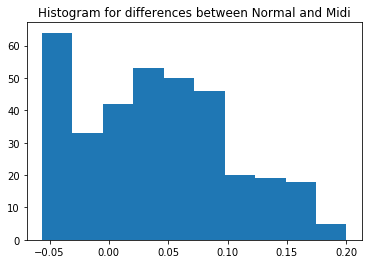

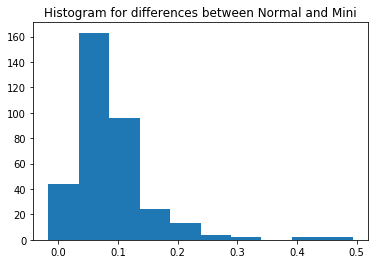

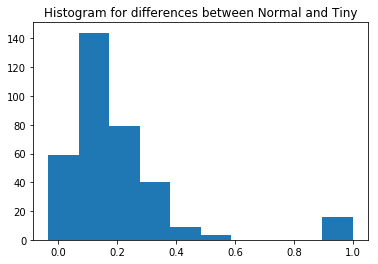

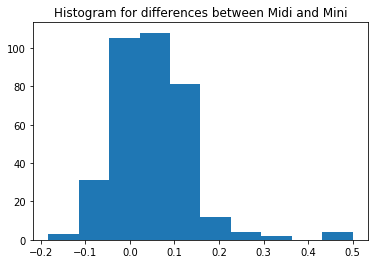

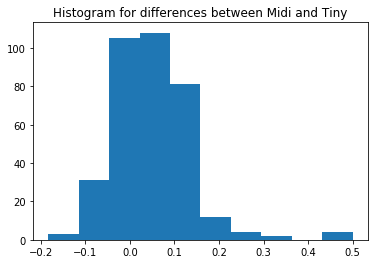

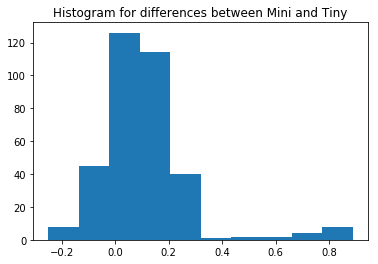

Plots for the  recall  and  dt


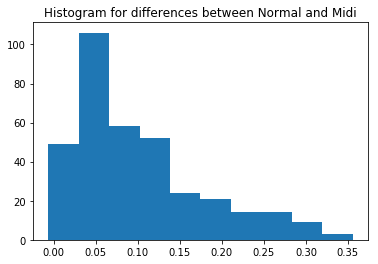

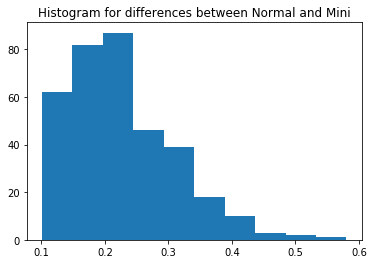

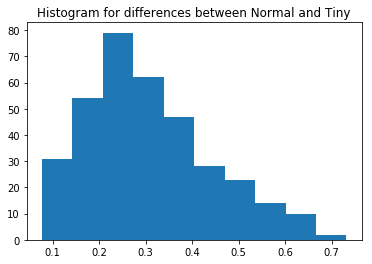

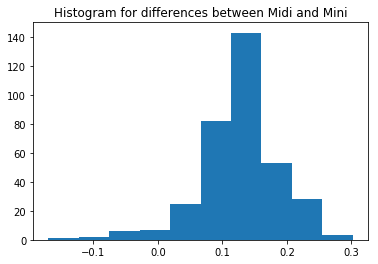

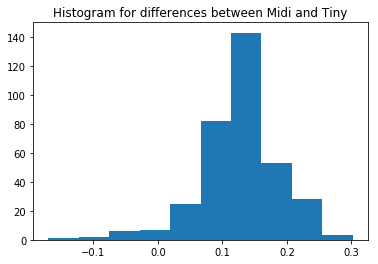

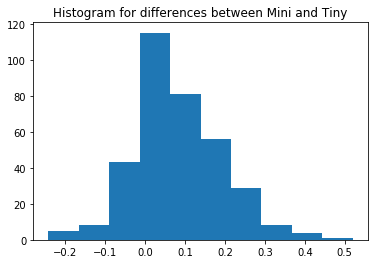

Plots for the  recall  and  knn


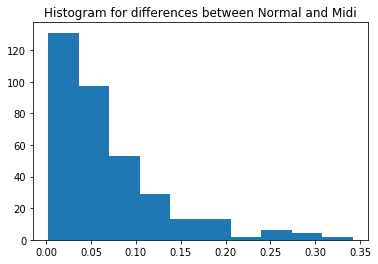

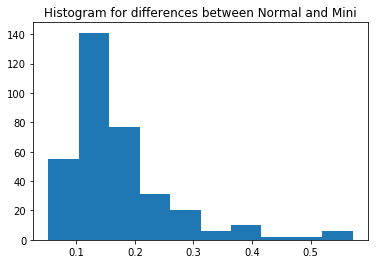

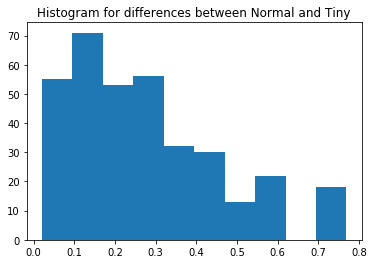

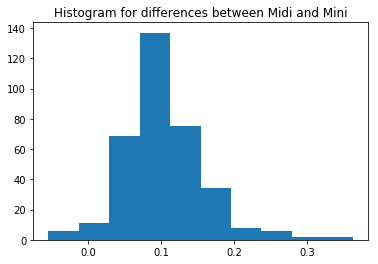

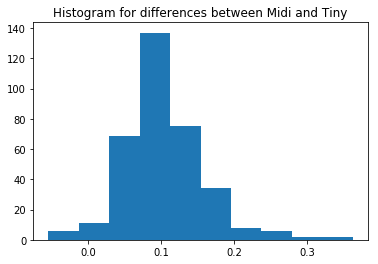

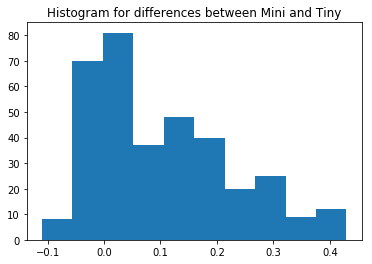

Plots for the  recall  and  rf


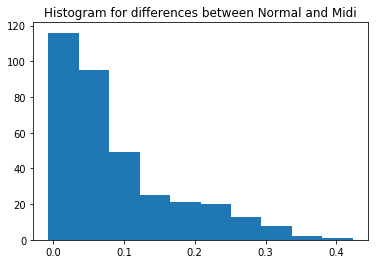

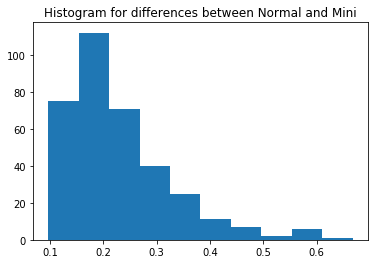

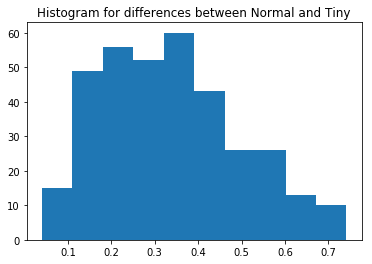

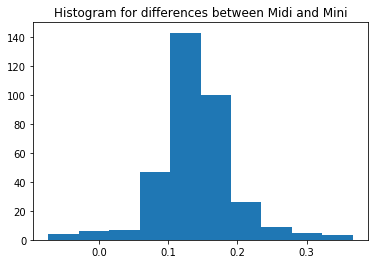

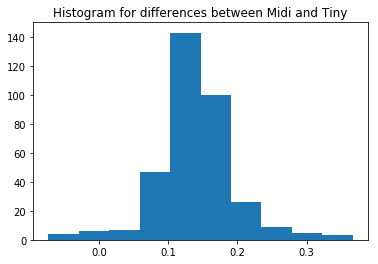

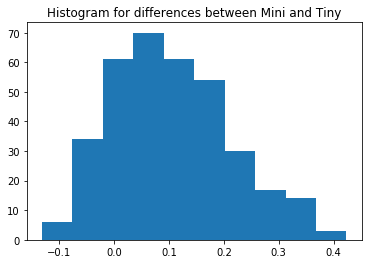

Plots for the  recall  and  sgd


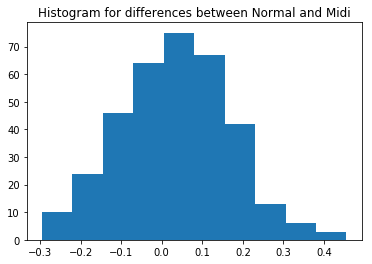

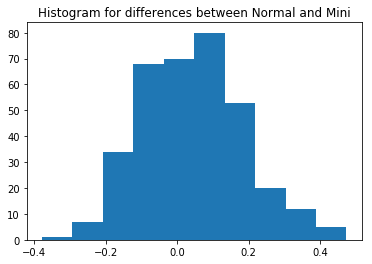

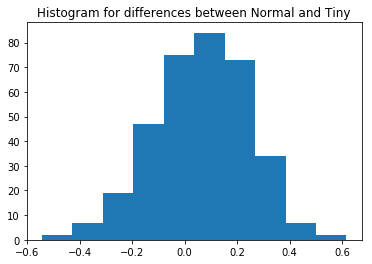

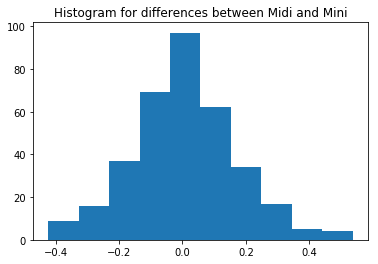

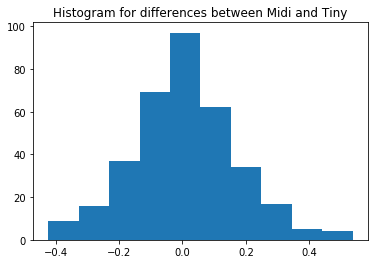

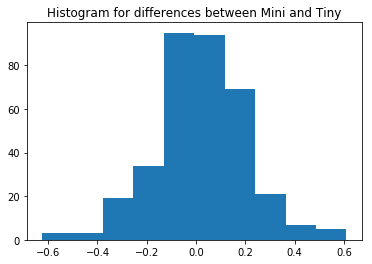

Plots for the  recall  and  svm


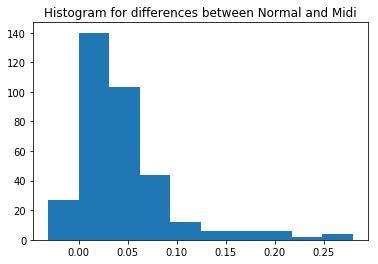

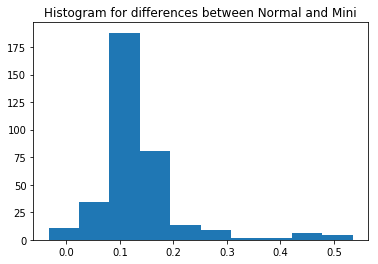

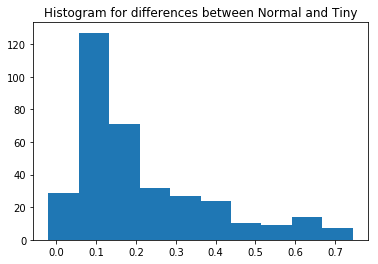

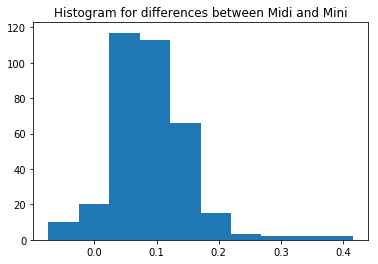

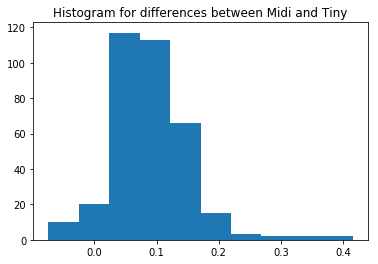

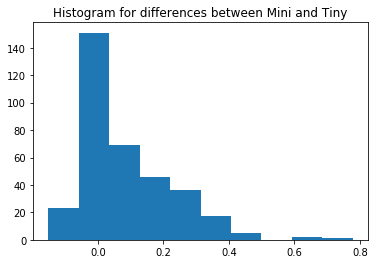

Plots for the  f1  and  dt


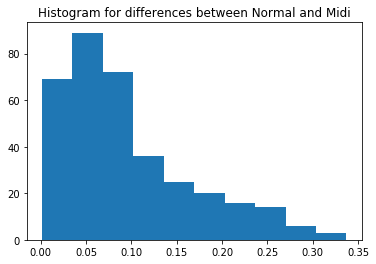

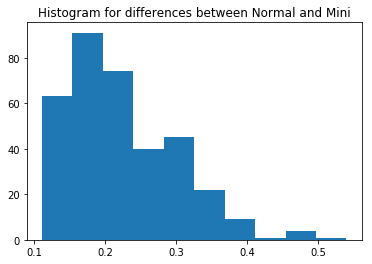

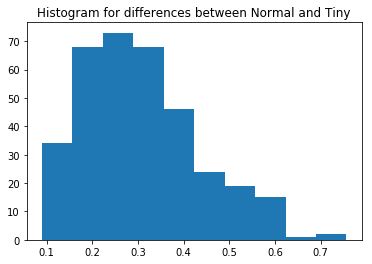

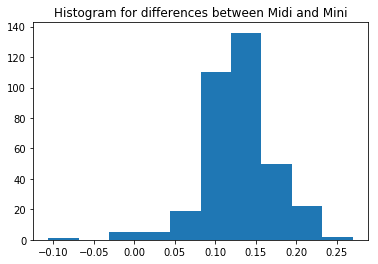

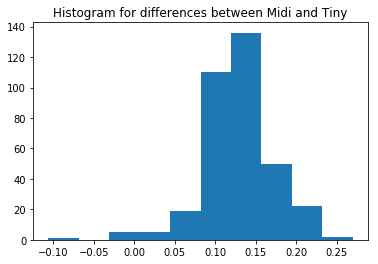

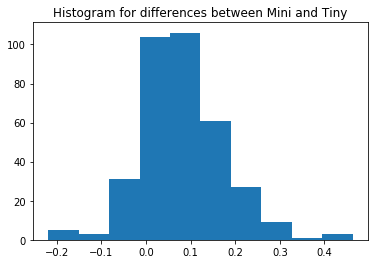

Plots for the  f1  and  knn


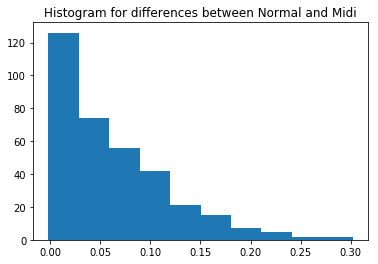

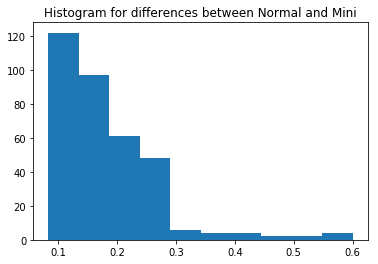

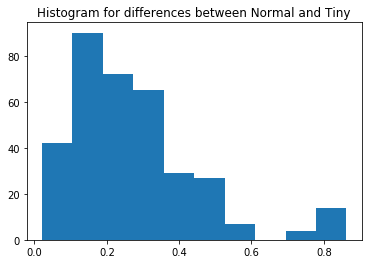

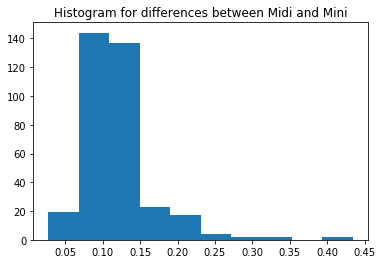

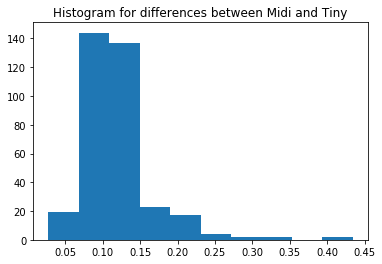

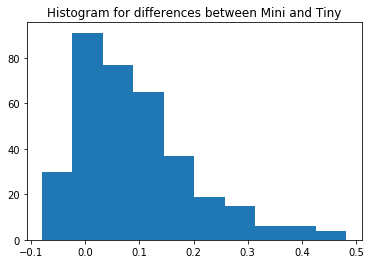

Plots for the  f1  and  rf


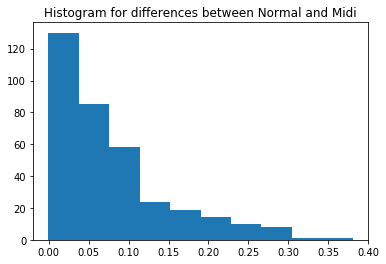

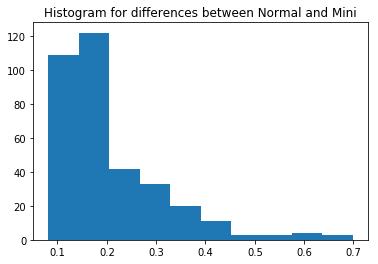

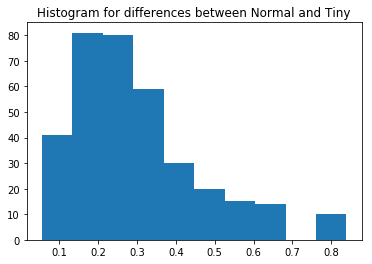

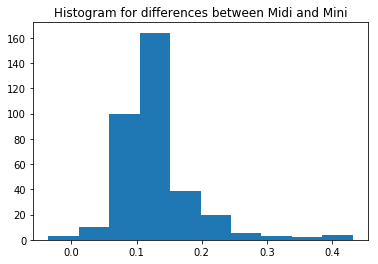

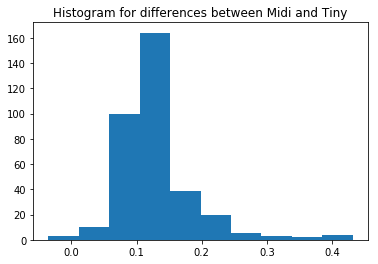

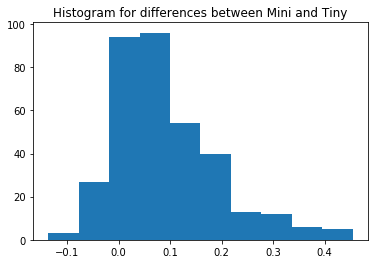

Plots for the  f1  and  sgd


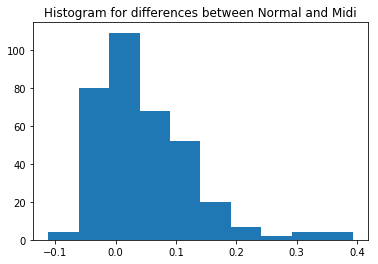

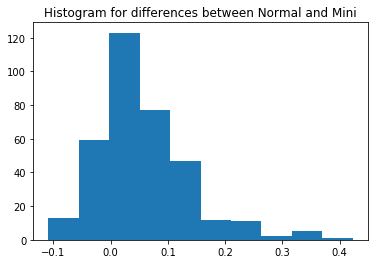

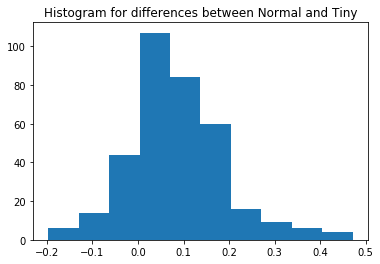

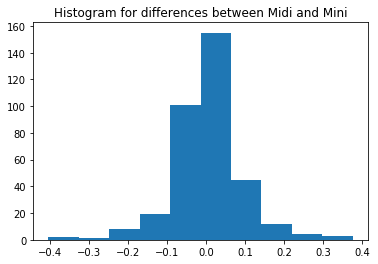

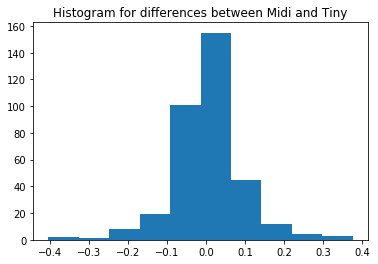

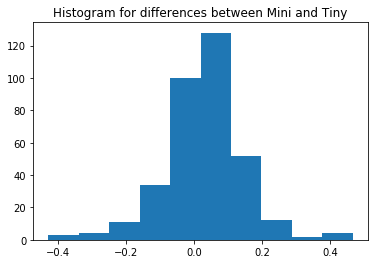

Plots for the  f1  and  svm


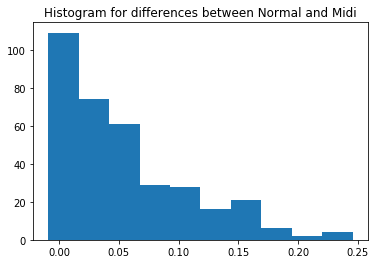

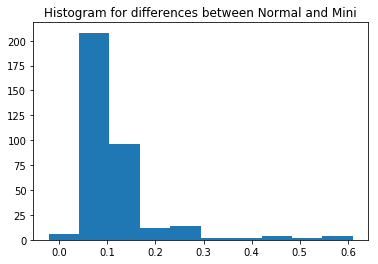

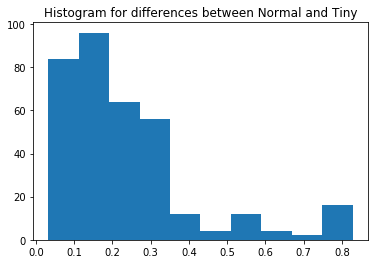

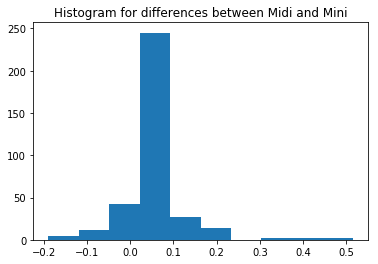

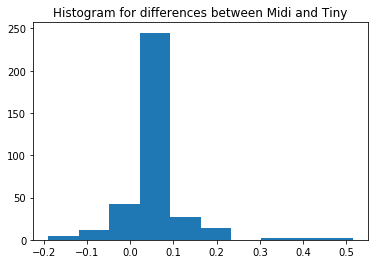

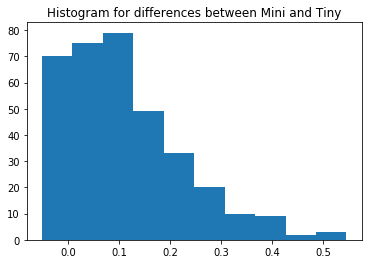

Plots for the  auc  and  dt


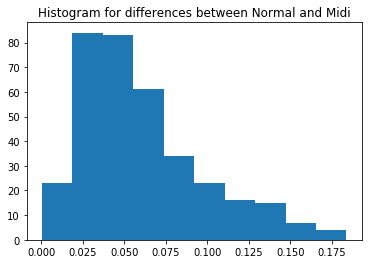

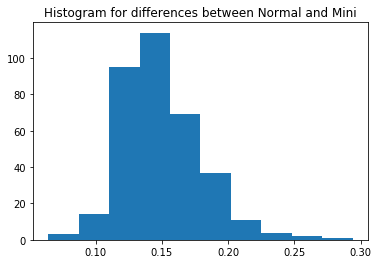

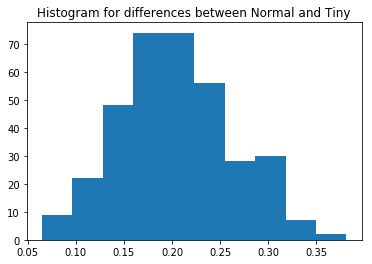

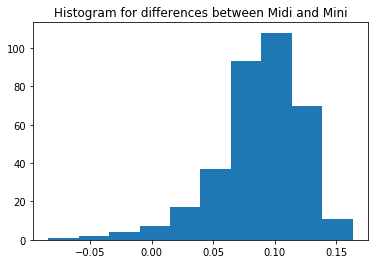

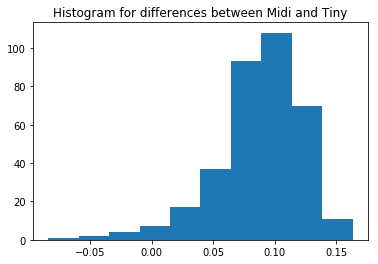

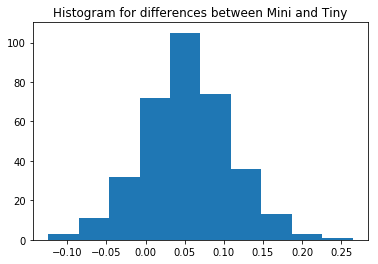

Plots for the  auc  and  knn


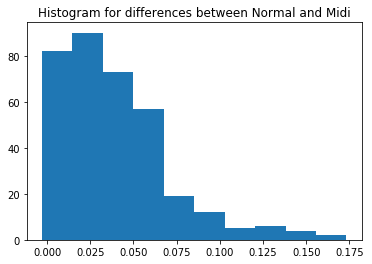

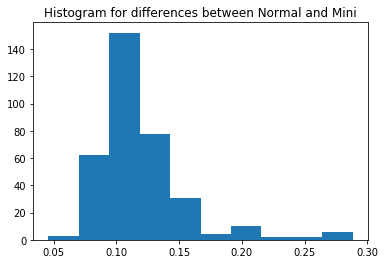

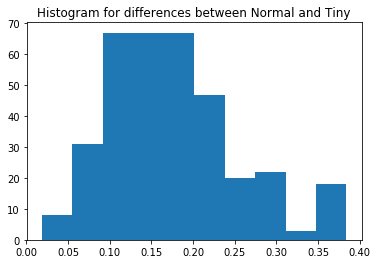

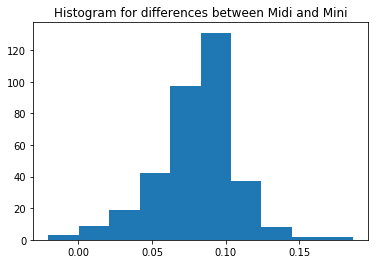

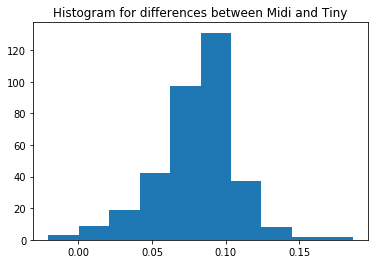

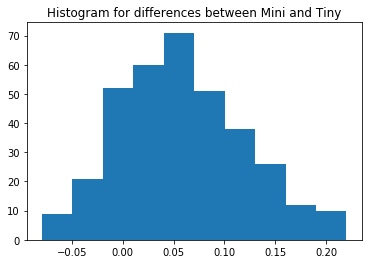

Plots for the  auc  and  rf


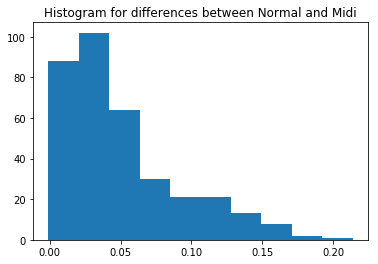

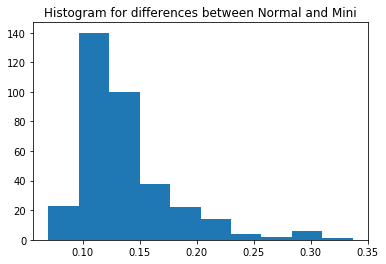

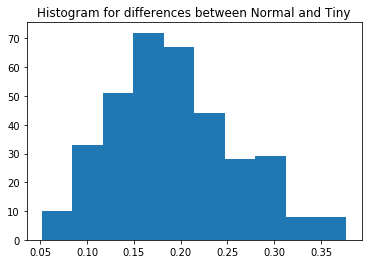

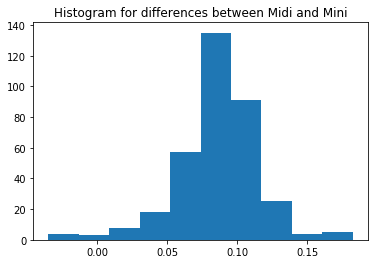

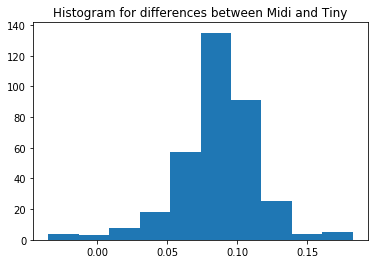

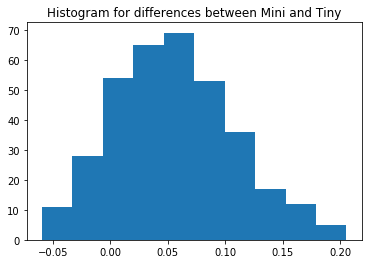

Plots for the  auc  and  sgd


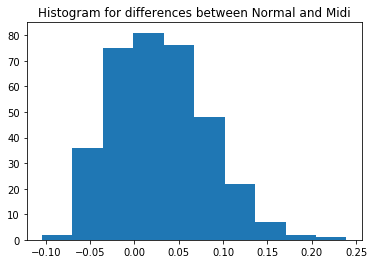

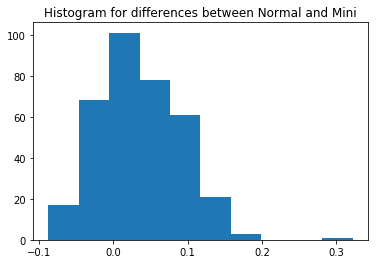

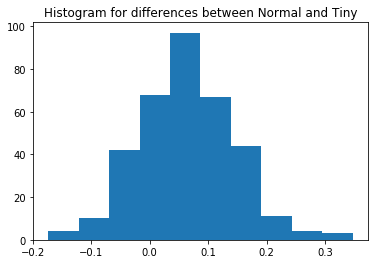

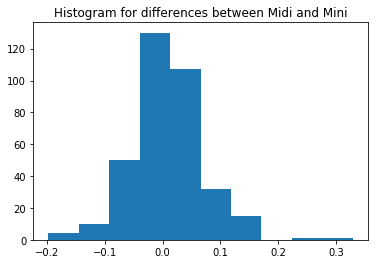

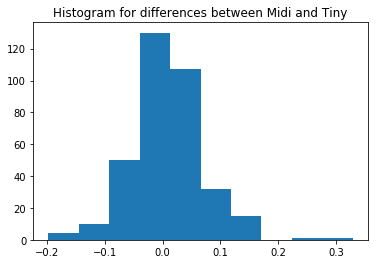

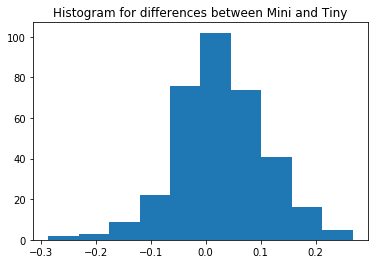

Plots for the  auc  and  svm


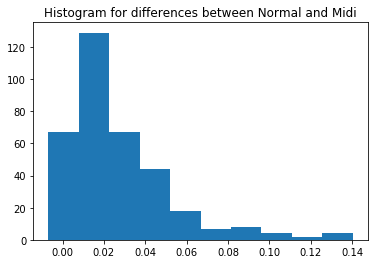

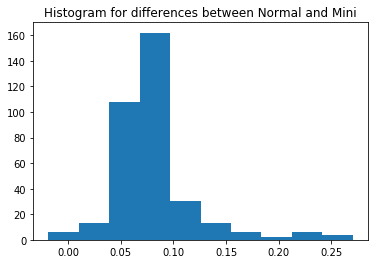

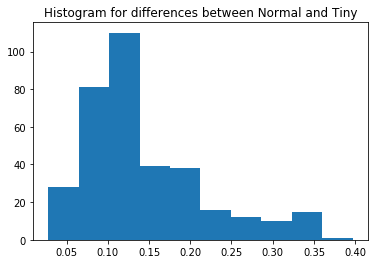

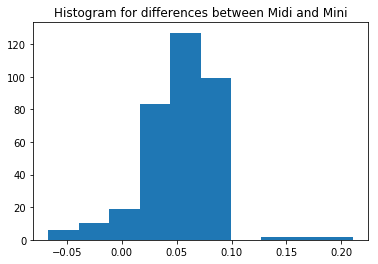

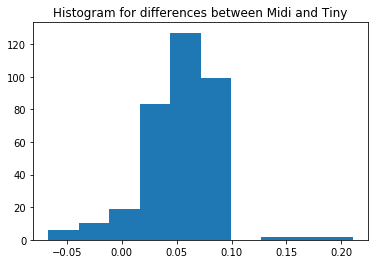

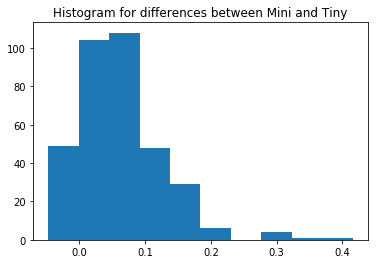

In [46]:
nor_mid = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
nor_min = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
nor_tin = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
mid_min = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
mid_tin = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
min_tin = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
 
diff_measures_dt=[diff_accs_dt, diff_precs_dt, diff_recs_dt, diff_f1s_dt, diff_aucs_dt];

for performance in range(0, len(performance_names)):
    for algorithm in range(0, len(algorithm_names)):
        print('Plots for the ', performance_names[performance], ' and ', algorithm_names[algorithm])
        nor_mid[performance_names[performance]][algorithm] = np.subtract(imbs[0][performance_names[performance]][algorithm], imbs[1][performance_names[performance]][algorithm])
        plt.hist(nor_mid[performance_names[performance]][algorithm])
        plt.title("Histogram for differences between Normal and Midi");
        plt.show();
        nor_min[performance_names[performance]][algorithm] = np.subtract(imbs[0][performance_names[performance]][algorithm], imbs[2][performance_names[performance]][algorithm])
        plt.hist(nor_min[performance_names[performance]][algorithm])
        plt.title("Histogram for differences between Normal and Mini");
        plt.show();
        nor_tin[performance_names[performance]][algorithm] = np.subtract(imbs[0][performance_names[performance]][algorithm], imbs[3][performance_names[performance]][algorithm])
        plt.hist(nor_tin[performance_names[performance]][algorithm])
        plt.title("Histogram for differences between Normal and Tiny");
        plt.show();
        mid_min[performance_names[performance]][algorithm] = np.subtract(imbs[1][performance_names[performance]][algorithm], imbs[2][performance_names[performance]][algorithm])
        plt.hist(mid_min[performance_names[performance]][algorithm])
        plt.title("Histogram for differences between Midi and Mini");
        plt.show();
        mid_tin[performance_names[performance]][algorithm] = np.subtract(imbs[1][performance_names[performance]][algorithm], imbs[2][performance_names[performance]][algorithm])
        plt.hist(mid_tin[performance_names[performance]][algorithm])
        plt.title("Histogram for differences between Midi and Tiny");
        plt.show();
        min_tin[performance_names[performance]][algorithm] = np.subtract(imbs[2][performance_names[performance]][algorithm], imbs[3][performance_names[performance]][algorithm])
        plt.hist(min_tin[performance_names[performance]][algorithm])
        plt.title("Histogram for differences between Mini and Tiny");
        plt.show();
                  
            

In [51]:
difs=[nor_mid, nor_min, nor_tin, mid_min, mid_tin, min_tin]
wilc_names = ['Normal-Midi', 'Normal-Mini', 'Normal-Tiny', 'Midi-Mini', 'Midi-Tiny','Mini-Tiny']
wilcox_nor_mid = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
wilcox_nor_min = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
wilcox_nor_tin = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
wilcox_mid_min = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
wilcox_mid_tin = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
wilcox_min_tin = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};

wilcoxs = [wilcox_nor_mid, wilcox_nor_min, wilcox_nor_tin, wilcox_mid_min, wilcox_mid_tin, wilcox_min_tin];

wilcox_nor_mid_ps = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
wilcox_nor_min_ps = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
wilcox_nor_tin_ps = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
wilcox_mid_min_ps = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
wilcox_mid_tin_ps = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
wilcox_min_tin_ps = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};

wilcoxs_ps = [wilcox_nor_mid_ps, wilcox_nor_min_ps, wilcox_nor_tin_ps, wilcox_mid_min_ps, wilcox_mid_tin_ps, wilcox_min_tin_ps];

wilcox_nor_mid_stats = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
wilcox_nor_min_stats = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
wilcox_nor_tin_stats = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
wilcox_mid_min_stats = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
wilcox_mid_tin_stats = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};
wilcox_min_tin_stats = {'accuracy':[[],[],[],[],[]], 'precision':[[],[],[],[],[]], 'recall':[[],[],[],[],[]], 'f1':[[],[],[],[],[]], 'auc':[[],[],[],[],[]]};

wilcoxs_stats = [wilcox_nor_mid_stats, wilcox_nor_min_stats, wilcox_nor_tin_stats, wilcox_mid_min_stats, wilcox_mid_tin_stats, wilcox_min_tin_stats];

for wilcoxx in range(0, len(wilcoxs)):
    print(wilc_names[wilcoxx]);
    for performance in range(0, len(performance_names)):
        for algorithm in range(0, len(algorithm_names)):
            wil = sp.stats.wilcoxon(difs[wilcoxx][performance_names[performance]][algorithm], zero_method="zsplit")
            wilcoxs[wilcoxx][performance_names[performance]][algorithm] = wil
            wilcoxs_ps[wilcoxx][performance_names[performance]][algorithm] = wil.pvalue;
            wilcoxs_stats[wilcoxx][performance_names[performance]][algorithm] = wil.statistic;
            print('p value for ', performance_names[performance], 'in ', algorithm_names[algorithm], 'is: ', wil.pvalue)


Normal-Midi
p value for  accuracy in  dt is:  4.05192115722e-59
p value for  accuracy in  knn is:  2.70836147544e-58
p value for  accuracy in  rf is:  4.17367022712e-59
p value for  accuracy in  sgd is:  7.11317760934e-28
p value for  accuracy in  svm is:  4.57711997155e-55
p value for  precision in  dt is:  4.23271592099e-59
p value for  precision in  knn is:  2.73969361902e-42
p value for  precision in  rf is:  2.18922868695e-55
p value for  precision in  sgd is:  1.90458333697e-15
p value for  precision in  svm is:  8.19317412906e-23
p value for  recall in  dt is:  4.41831709397e-59
p value for  recall in  knn is:  4.05242400789e-59
p value for  recall in  rf is:  4.49498963615e-59
p value for  recall in  sgd is:  5.4242658027e-06
p value for  recall in  svm is:  8.54608387144e-53
p value for  f1 in  dt is:  4.05475282131e-59
p value for  f1 in  knn is:  7.20249083232e-59
p value for  f1 in  rf is:  4.16061555743e-59
p value for  f1 in  sgd is:  6.37360675428e-24
p value for  f1 in 

In [58]:
len(imbs[0]['accuracy'][0])

350

In [64]:
pd.DataFrame([imbs[0]['accuracy'][0],imbs[0]['accuracy'][1], imbs[0]['accuracy'][2], imbs[0]['accuracy'][3]]).T

,0,1,2,3
0,0.938556,0.951556,0.955000,0.880889
1,0.938222,0.953778,0.953444,0.845111
2,0.940333,0.952889,0.951000,0.893444
3,0.938222,0.952000,0.952333,0.838667
4,0.938444,0.952667,0.956000,0.879667
5,0.941778,0.952778,0.951778,0.861222
6,0.938778,0.952000,0.951556,0.875111
7,0.941222,0.951556,0.954778,0.891556
8,0.939444,0.953556,0.952111,0.865889
9,0.940556,0.952778,0.951778,0.885889


In [65]:
pd.DataFrame([imbs[0]['precision'][0],imbs[0]['precision'][1], imbs[0]['precision'][2], imbs[0]['precision'][3]]).T

,0,1,2,3
0,0.941389,0.951055,0.956483,0.843979
1,0.935433,0.951072,0.955315,0.861873
2,0.940806,0.951996,0.956542,0.835864
3,0.941350,0.954155,0.957907,0.879040
4,0.939585,0.952584,0.957188,0.845460
5,0.941970,0.951986,0.957442,0.860517
6,0.935505,0.949486,0.951055,0.836228
7,0.942702,0.950853,0.953191,0.853887
8,0.938524,0.950045,0.953551,0.835920
9,0.936706,0.950772,0.957859,0.844699


In [66]:
pd.DataFrame([imbs[0]['recall'][0],imbs[0]['recall'][1], imbs[0]['recall'][2], imbs[0]['recall'][3]]).T

,0,1,2,3
0,0.933992,0.951055,0.952402,0.931522
1,0.940054,0.955770,0.950382,0.818141
2,0.938482,0.952851,0.943871,0.976426
3,0.933318,0.948586,0.945218,0.781545
4,0.935788,0.951729,0.953749,0.926134
5,0.940278,0.952627,0.944544,0.858779
6,0.941176,0.953749,0.951055,0.929726
7,0.938258,0.951280,0.955546,0.942075
8,0.939156,0.956444,0.949484,0.907050
9,0.943646,0.953974,0.944095,0.942748


In [67]:
pd.DataFrame([imbs[0]['f1'][0],imbs[0]['f1'][1], imbs[0]['f1'][2], imbs[0]['f1'][3]]).T

,0,1,2,3
0,0.937676,0.951055,0.954438,0.885592
1,0.937738,0.953415,0.952842,0.839438
2,0.939643,0.952424,0.950164,0.900694
3,0.937317,0.951362,0.951520,0.827430
4,0.937683,0.952156,0.955466,0.883960
5,0.941124,0.952306,0.950949,0.859647
6,0.938332,0.951613,0.951055,0.880502
7,0.940475,0.951066,0.954367,0.895816
8,0.938840,0.953233,0.951513,0.870033
9,0.940163,0.952370,0.950927,0.891034


In [68]:
pd.DataFrame([imbs[0]['auc'][0],imbs[0]['auc'][1], imbs[0]['auc'][2], imbs[0]['auc'][3]]).T

,0,1,2,3
0,0.938509,0.951550,0.954974,0.881401
1,0.938241,0.953798,0.953413,0.844838
2,0.940315,0.952889,0.950928,0.894284
3,0.938173,0.951965,0.952261,0.838089
4,0.938418,0.952657,0.955977,0.880137
5,0.941763,0.952776,0.951705,0.861197
6,0.938802,0.952018,0.951550,0.875664
7,0.941192,0.951553,0.954786,0.892067
8,0.939442,0.953585,0.952085,0.866305
9,0.940587,0.952790,0.951700,0.886464
